<a href="https://colab.research.google.com/github/head1ton/EURI_ML/blob/main/text-detection/tesseract_text_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
!scp '/content/gdrive/MyDrive/data.zip' '/content/data.zip'

!unzip '/content/data.zip' -d '/content/'

In [1]:
!apt install tesseract-ocr
!apt install libtesseract-drive

!pip install pytesseract
!pip install Pillow
!pip install easyocr
!pip install boto3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (8,587 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 126209 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [2]:
!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 32.7 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [3]:
from IPython.display import Image, display

In [4]:
import pytesseract
from PIL import Image as PILImage
from easyocr import Reader
import boto3

In [18]:
access_key = None
secret_access_key = None

textract_client = boto3.client('textract',
                               aws_access_key_id=access_key,
                               aws_secret_access_key=secret_access_key,
                               region_name='us-east-1')


In [6]:
def read_text_tesseract(image_path):
    text = pytesseract.image_to_string(PILImage.open(image_path), lang='eng')
    return text

In [7]:
read_text_tesseract('/content/data/text11.jpg')

"I choose you. And I'll choose\nyou over and over. Without\n\npause, without a doubt,\nin a heartbeat. I'll keep\nchoosing you.\n\n \n\x0c"

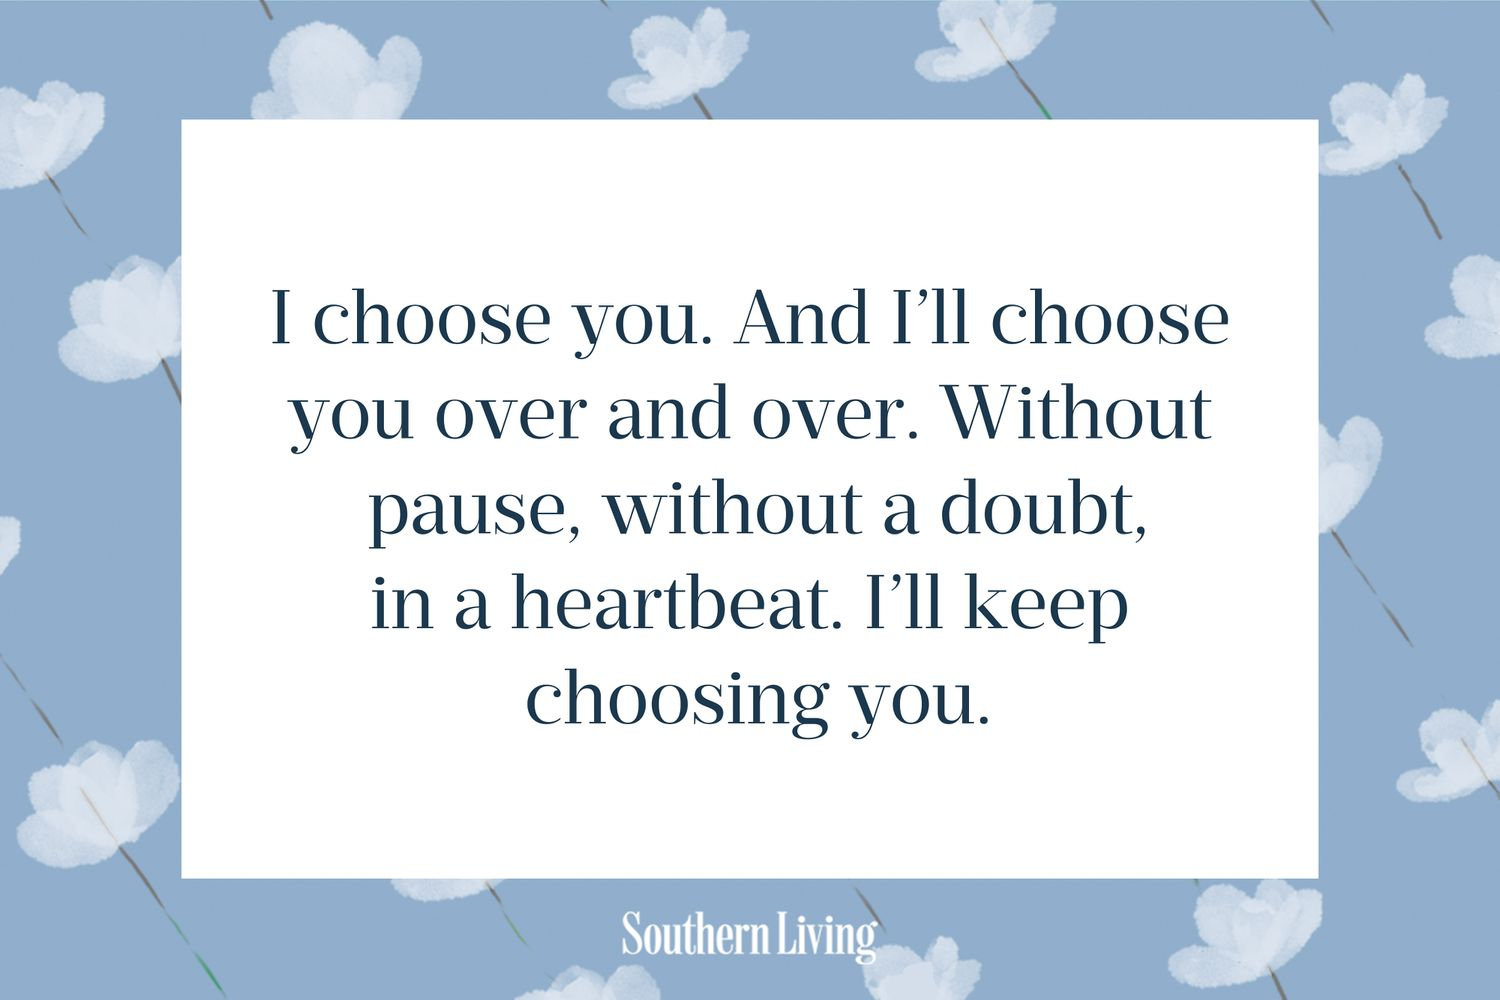

In [8]:
display(Image(filename='/content/data/text11.jpg'))

In [9]:
reader = Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [10]:
def read_text_easyocr(image_path):
    text = ''
    results = reader.readtext(PILImage.open(image_path))
    for result in results:
        text = text + result[1] + ' '

    text = text[:-1]
    return text

In [11]:
read_text_easyocr('/content/data/text2.jpg')

'MARKET'

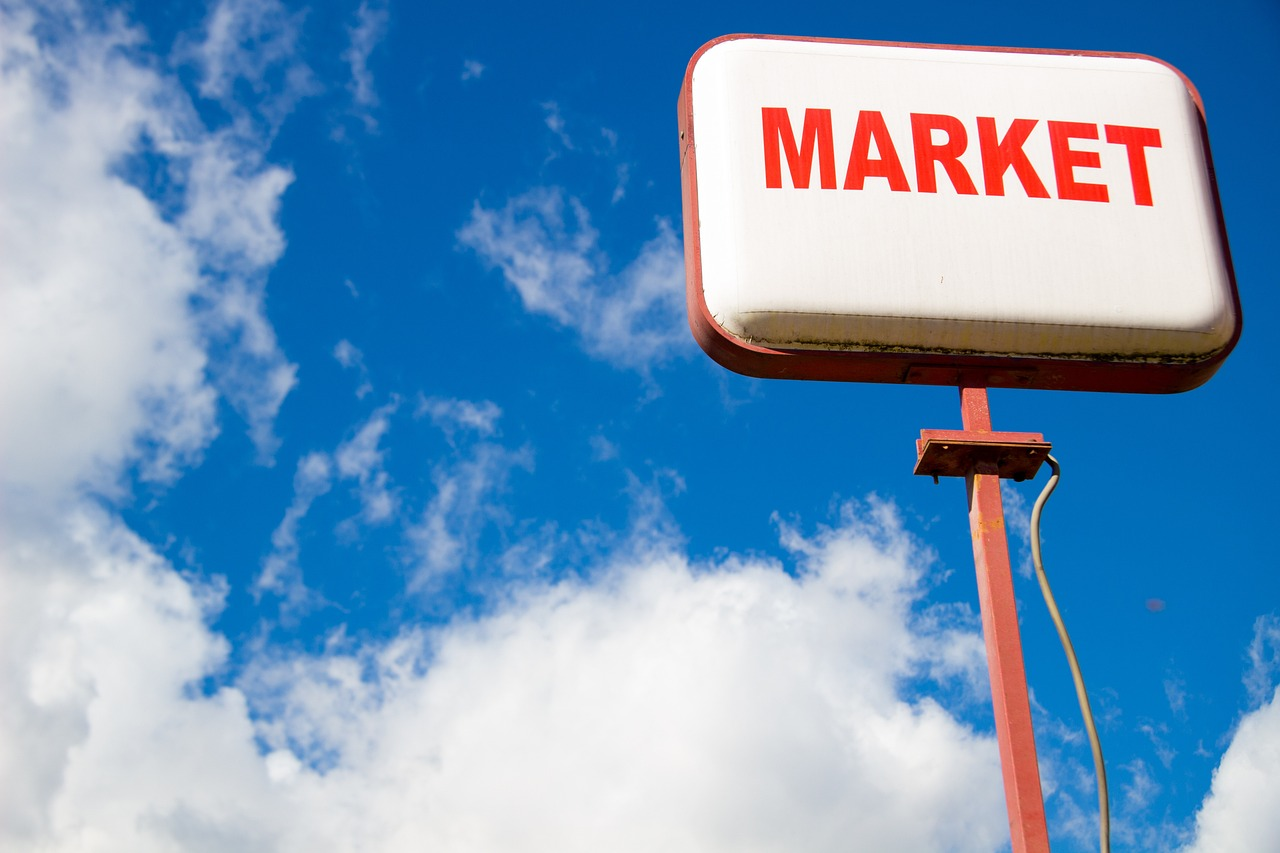

In [12]:
display(Image(filename='/content/data/text2.jpg'))

([[np.int32(585), np.int32(75)], [np.int32(1222), np.int32(75)], [np.int32(1222), np.int32(232)], [np.int32(585), np.int32(232)]], '5 TEXTS THAT', np.float64(0.9334309649432383))
([[np.int32(626), np.int32(262)], [np.int32(1168), np.int32(262)], [np.int32(1168), np.int32(410)], [np.int32(626), np.int32(410)]], 'MAke MEN', np.float64(0.5819593065098583))
([[np.int32(580), np.int32(444)], [np.int32(1212), np.int32(444)], [np.int32(1212), np.int32(596)], [np.int32(580), np.int32(596)]], 'FALL IN LOVE', np.float64(0.7229943726514417))
([[np.int32(454), np.int32(640)], [np.int32(546), np.int32(640)], [np.int32(546), np.int32(688)], [np.int32(454), np.int32(688)]], 'LOVE ', np.float64(0.5339313451541833))
([[np.int32(607), np.int32(643)], [np.int32(791), np.int32(643)], [np.int32(791), np.int32(687)], [np.int32(607), np.int32(687)]], 'LEARNINGS', np.float64(0.9900472149789946))
([[np.int32(693), np.int32(683)], [np.int32(789), np.int32(683)], [np.int32(789), np.int32(697)], [np.int32(693), n

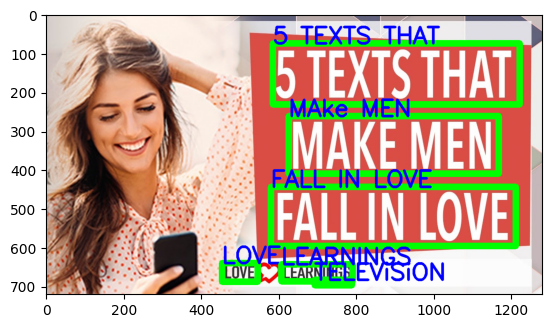

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy
import easyocr

image_path = '/content/data/text15.jpg'

img = cv2.imread(image_path)

reader = easyocr.Reader(['en'], gpu=True)

text_ = reader.readtext(img)

threshold = 0.25

for t_, t in enumerate(text_):
    print(t)

    bbox, text, score = t

    if score > threshold:
        cv2.rectangle(img, [int(j) for j in bbox[0]], [int(j) for j in bbox[2]], (0, 255, 0), 15)
        cv2.putText(img, text, [int(j) for j in bbox[0]], cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
def read_text_textract(image_path):
    with open(image_path, 'rb') as im:
        response = textract_client.detect_document_text(Document={'Bytes': im.read()})

    text = ''
    for item in response['Blocks']:
        if item['BlockType'] == 'LINE':
            text = text + item['Text'] + ' '

    text = text[:-1]
    return text

In [48]:
import os

def jaccard_similarity(sentence1, sentence2):
    # Tokenize sentences into sets of words
    set1 = set(sentence1.lower().split())
    set2 = set(sentence2.lower().split())

    # Calculate Jaccard similarity
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))

    # Avoid division by zero if both sets are empty
    similarity = intersection_size / union_size if union_size != 0 else 0.0

    return similarity

In [54]:
score_tesseract = 0
score_easyocr = 0
score_textract = 0

for image_path_ in os.listdir('/content/data'):
    image_path = os.path.join('/content/data', image_path_)

    if os.path.isfile(image_path):
        gt = image_path[:-4].replace('_', ' ').lower()

    score_tesseract += jaccard_similarity(gt, read_text_tesseract(image_path).lower().replace('\n', '').replace('!', '').replace('?', '').replace('.', ''))
    score_easyocr += jaccard_similarity(gt, read_text_easyocr(image_path).lower().replace('\n', '').replace('!', '').replace('?', '').replace('.', ''))
    # score_textract += jaccard_similarity(gt, read_text_textract(image_path).lower().replace('\n', '').replace('!', '').replace('?', '').replace('.', ''))

# print('Tesseract: ', score_tesseract / len(os.listdir('/content/data')))
# print('EasyOCR: ', score_easyocr / len(os.listdir('/content/data')))
# print('Textract: ', score_textract / len(os.listdir('/content/data')))

print('Tesseract: ', score_tesseract / 100)
print('EasyOCR: ', score_easyocr / 100)
# print('Textract: ', score_textract / 100)